In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# 设置图片字体
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 1. 读取源数据

In [3]:
orders = pd.read_csv('../source/dataset.csv')

In [4]:
orders.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,1,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
1,2,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
2,3,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
3,4,IT-2011-3647632,2011/1/1,2011/1/5,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,5,HU-2011-1220,2011/1/1,2011/1/5,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [5]:
orders.shape

(51101, 24)

In [6]:
orders.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost
count,51101.000000,9962.000000,51101.000000,51101.000000,51101.000000,51101.000000,51101.000000
mean,25548.867987,55225.189319,246.568891,3.476018,0.143468,28.518805,26.383634
std,14751.024724,32062.973837,487.764812,2.279123,0.213399,174.480944,57.284384
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12774.000000,23223.000000,30.816000,2.000000,0.000000,0.000000,2.610000
50%,25549.000000,57103.000000,85.140000,3.000000,0.000000,9.240000,7.800000
75%,38323.000000,90008.000000,251.100000,5.000000,0.200000,36.810000,24.450000
max,51098.000000,99301.000000,22638.480000,14.000000,1.500000,8399.976000,933.570000


In [7]:
orders.isna().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode            11
CustomerID           0
CustomerName         0
Segment              0
City                 0
State                0
Country              0
PostalCode       41139
Market               0
Region               0
ProductID            0
Category             0
Sub-Category         0
ProductName          0
Sales                0
Quantity             0
Discount             0
Profit               0
ShippingCost         0
OrderPriority        0
dtype: int64

# 2. 数据清洗

## 2.1 去除发货时间早于下单时间的异常数据

In [8]:
orders['ShipDate'] = pd.to_datetime(orders['ShipDate'])
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

In [9]:
orders.drop(index=orders[orders['ShipDate'] < orders['OrderDate']].index, inplace=True)

## 2.2 删除重复的RowID

In [10]:
orders.RowID.unique().size

51094

In [11]:
orders.shape

(51097, 24)

In [12]:
orders.drop(orders[orders.RowID.duplicated()].index, inplace=True)

## 2.3 清洗ShipMode

In [13]:
orders[orders.ShipMode.isnull()]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
13666,13665,BU-2012-460,2012-07-21,2012-07-25,NaN,AH-30,Aaron Hawkins,Corporate,Pazardzhik,Pazardzhik,...,OFF-GLO-10001127,Office Supplies,Envelopes,"GlobeWeis Business Envelopes, Set of 50",17.340,1,0.0,4.680,1.29,Medium
13674,13673,BU-2012-460,2012-07-21,2012-07-25,NaN,AH-30,Aaron Hawkins,Corporate,Pazardzhik,Pazardzhik,...,FUR-OFF-10001132,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",176.430,1,0.0,17.640,12.70,Medium
18385,18384,AG-2012-6390,2012-11-26,2012-11-30,NaN,GH-4410,Gary Hansen,Home Office,Algiers,Alger,...,OFF-SAN-10000335,Office Supplies,Paper,"SanDisk Parchment Paper, Premium",16.710,1,0.0,3.150,1.10,Medium
33167,33165,MZ-2013-7330,2013-12-23,2013-12-25,NaN,CS-1950,Carlos Soltero,Consumer,Chimoio,Manica,...,OFF-ELI-10003004,Office Supplies,Supplies,"Elite Ruler, Easy Grip",15.420,1,0.0,1.050,1.03,Medium
33619,33617,AE-2013-1530,2013-12-31,2014-01-03,NaN,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,OFF-STI-10000114,Office Supplies,Supplies,"Stiletto Letter Opener, High Speed",16.668,2,0.7,-29.472,1.41,High
33622,33620,AE-2013-1530,2013-12-31,2014-01-03,NaN,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,OFF-TEN-10002817,Office Supplies,Storage,"Tenex Folders, Blue",6.966,1,0.7,-8.604,1.75,High
38164,38162,MX-2014-153269,2014-05-19,2014-05-22,NaN,MC-17275,Marc Crier,Consumer,Rosario,Santa Fe,...,OFF-EN-10000338,Office Supplies,Envelopes,"Kraft Mailers, Recycled",43.740,3,0.4,7.260,7.50,High
44243,44241,AJ-2014-6170,2014-09-16,2014-09-18,NaN,SH-9975,Sally Hughsby,Corporate,Baku,Baki,...,OFF-ROG-10003733,Office Supplies,Storage,"Rogers Folders, Wire Frame",29.760,1,0.0,3.270,4.28,High
44321,44319,ES-2014-4138124,2014-09-17,2014-09-22,NaN,BF-11275,Beth Fritzler,Corporate,Oslo,Oslo,...,TEC-PH-10001937,Technology,Phones,"Nokia Audio Dock, Full Size",840.150,5,0.0,142.800,23.19,High
49931,49929,US-2014-134292,2014-12-14,2014-12-20,NaN,JK-15640,Jim Kriz,Home Office,La Chorrera,Panama,...,OFF-PA-10000781,Office Supplies,Paper,"Eaton Message Books, 8.5 x 11",29.664,3,0.4,-0.036,1.82,Medium


In [14]:
orders['ShipMode'].fillna(orders.ShipMode.mode()[0], inplace=True)

## 2.4 清洗Discount

In [15]:
orders.drop(orders[orders['Discount'] > 1].index, inplace=True)

## 2.5 清洗PostalCode

In [16]:
orders.fillna('未知', inplace=True)

## 2.6 数据整理

In [17]:
orders['year'] = orders['OrderDate'].dt.year
orders['month'] = orders['OrderDate'].dt.month
orders['quarter'] = orders['OrderDate'].dt.to_period('Q')

In [18]:
result = orders[['year', 'month', 'quarter']].head()
print(result)

   year  month quarter
0  2011      1  2011Q1
1  2011      1  2011Q1
2  2011      1  2011Q1
3  2011      1  2011Q1
4  2011      1  2011Q1


# 3. 数据分析

## 3.1 每年销售额

<AxesSubplot:xlabel='year'>

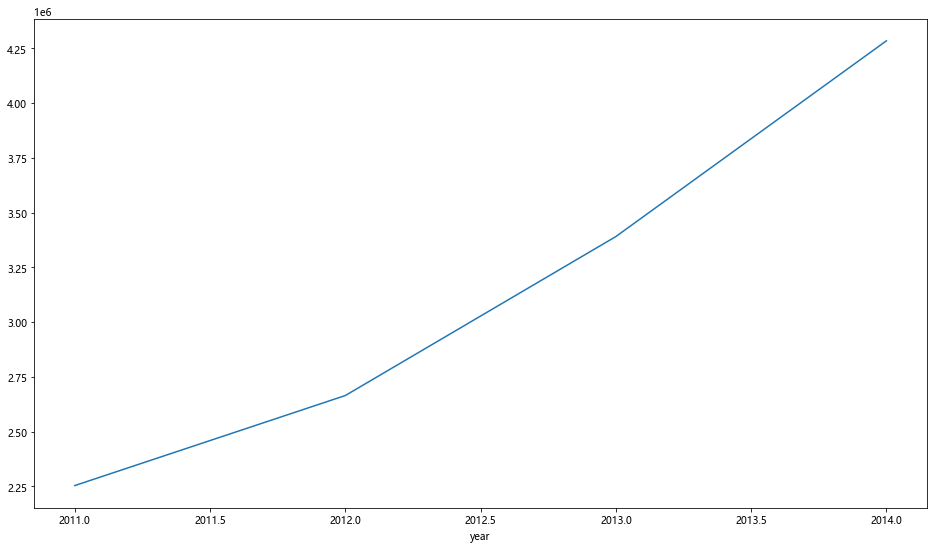

In [19]:
sales_year = orders.groupby(by='year')['Sales'].sum()
sales_year.plot(figsize=(16, 9))

In [20]:
sales_rate_12 = sales_year[2012] / sales_year[2011] - 1
sales_rate_13 = sales_year[2013] / sales_year[2012] - 1
sales_rate_14 = sales_year[2014] / sales_year[2013] - 1
print(sales_rate_12, sales_rate_13, sales_rate_14)

0.1823535506479863 0.2723623174080274 0.26354991607420075


In [21]:
sales_rate_12_label = f'{(sales_rate_12*100):.2f}%'
sales_rate_13_label = f'{(sales_rate_13*100):.2f}%'
sales_rate_14_label = f'{(sales_rate_14*100):.2f}%'
print(sales_rate_12_label, sales_rate_13_label, sales_rate_14_label)

18.24% 27.24% 26.35%


In [22]:
sales_rate = pd.DataFrame({
    'sales_all': sales_year,
    'sales_rate': [0, sales_rate_12, sales_rate_13, sales_rate_14],
    'sales_rate_label': [0, sales_rate_12_label, sales_rate_13_label, sales_rate_14_label]
})
print(sales_rate)

         sales_all  sales_rate sales_rate_label
year                                           
2011  2.254094e+06    0.000000                0
2012  2.665136e+06    0.182354           18.24%
2013  3.391018e+06    0.272362           27.24%
2014  4.284721e+06    0.263550           26.35%


In [23]:
# 设置风格
plt.style.use('ggplot')

In [24]:
y1, y2 = sales_rate['sales_all'], sales_rate['sales_rate']
x = list(map(str, sales_rate.index.to_list()))

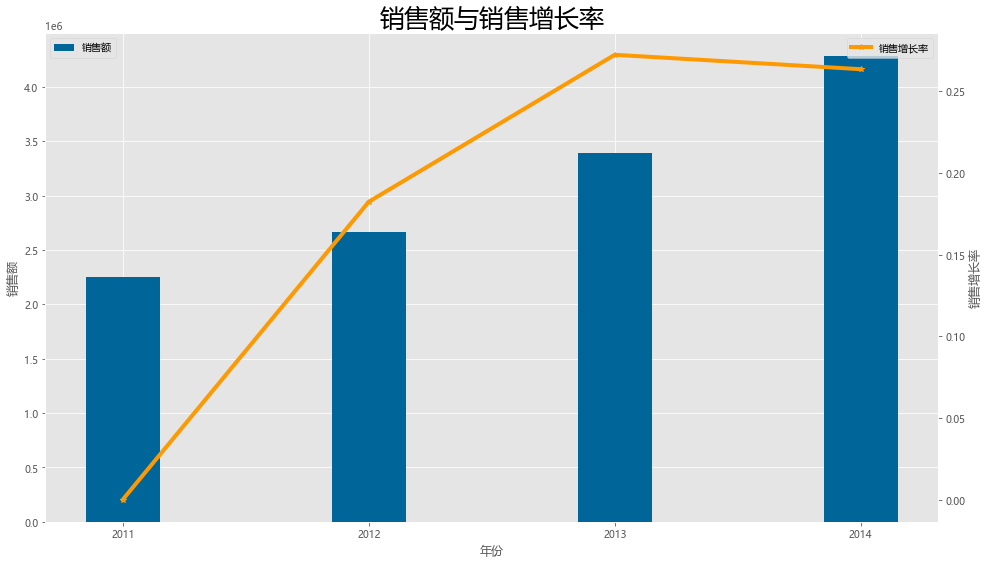

In [25]:
# 新建画布
fig = plt.figure(figsize=(16, 9))
# 新建子图1
ax1 = fig.add_subplot(1, 1, 1)
# ax1 与 ax2 共享x轴
ax2 = ax1.twinx()
ax1.bar(x, y1, color='#006699', label='销售额', width=0.3)
ax2.plot(x, y2, color='#ff9900', label='销售增长率', marker='*', linewidth=4)
ax1.set_xlabel('年份')
ax1.set_ylabel('销售额')
ax2.set_ylabel('销售增长率')
ax1.set_title('销售额与销售增长率', fontsize=25)
ax1.legend(loc='upper left')
ax2.legend(loc='best')
ax1.grid(True)
ax2.grid(False)
plt.show()

## 3.2 各市场销售额

In [26]:
sales_area = orders.groupby(by='Market')['Sales'].sum()
sales_area

Market
APAC      3.583989e+06
Africa    7.835941e+05
Canada    6.692817e+04
EMEA      8.056740e+05
EU        2.924398e+06
LATAM     2.134419e+06
US        2.295967e+06
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'2011-2014年各市场销售占比情况'}, ylabel='Sales'>

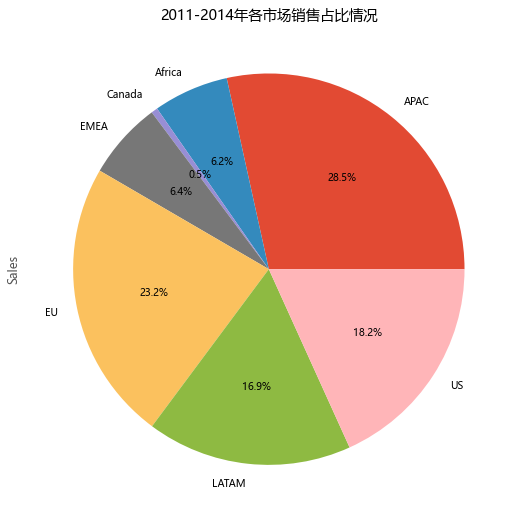

In [27]:
sales_area.plot(kind='pie', autopct='%1.1f%%', title='2011-2014年各市场销售占比情况', figsize=(16, 9))

<AxesSubplot:title={'center':'2011-2014年各市场销售占比情况'}, xlabel='Market'>

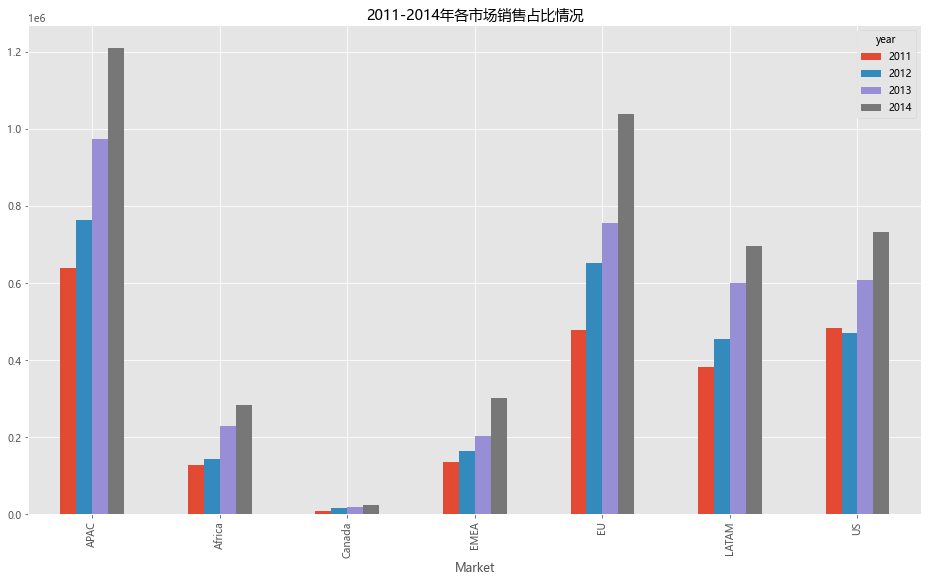

In [28]:
sales_area_year = orders.groupby(by=['year', 'Market'])['Sales'].sum()
sales_area_year = sales_area_year.reset_index(level=[0, 1])
sales_area_year = pd.pivot_table(sales_area_year, index='Market', columns='year', values='Sales')
sales_area_year.plot(kind='bar', title='2011-2014年各市场销售占比情况', figsize=(16, 9))

## 3.3 各市场各类目销售情况

<AxesSubplot:title={'center':'2011-2014年各市场各品类销售占比情况'}, xlabel='Market'>

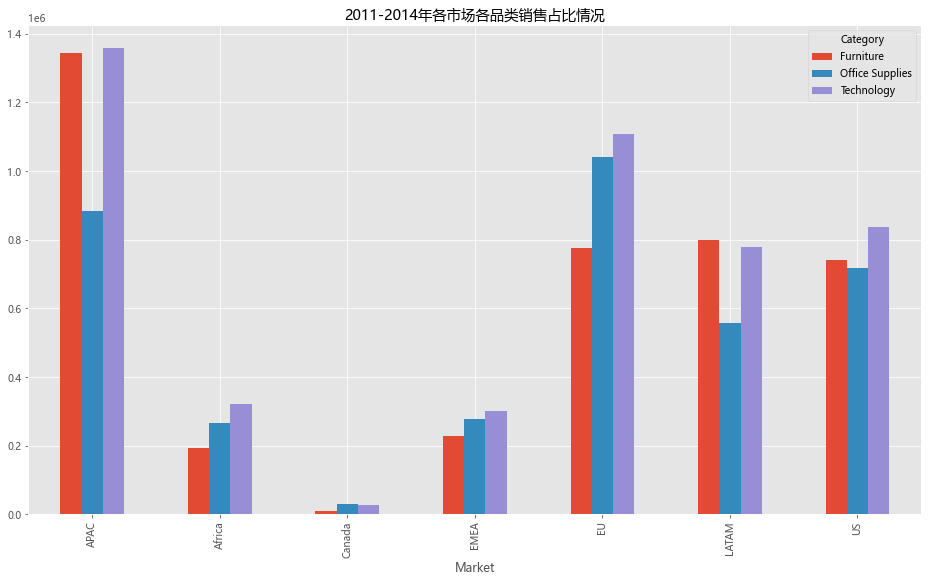

In [29]:
sales_area_category = orders.groupby(by=['Category', 'Market'])['Sales'].sum()
sales_area_category = sales_area_category.reset_index(level=[0, 1])
sales_area_category = pd.pivot_table(sales_area_category, index='Market', columns='Category', values='Sales')
sales_area_category.plot(kind='bar', title='2011-2014年各市场各品类销售占比情况', figsize=(16, 9))

## 3.4 销售淡旺季分析

<AxesSubplot:title={'center':'2011-2014年各月份销售额情况'}, xlabel='month'>

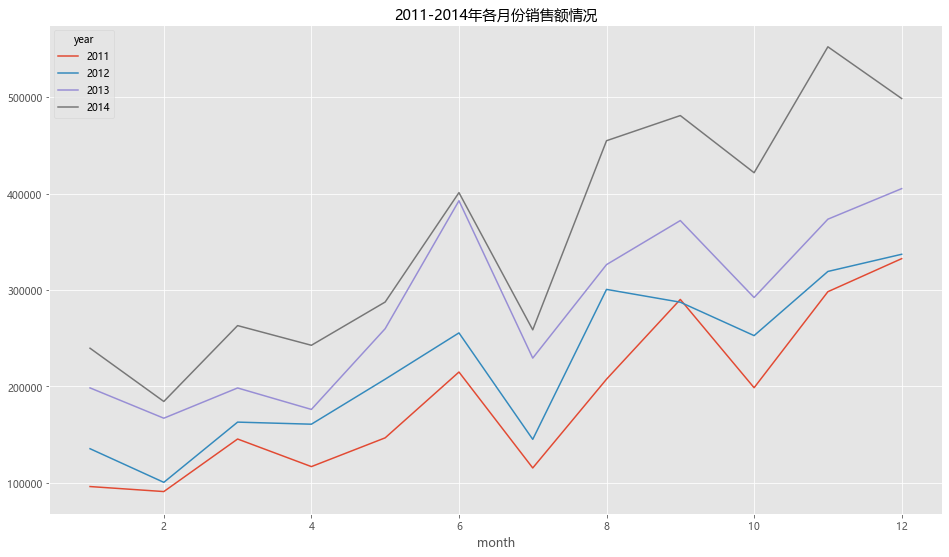

In [30]:
sales_year_month = orders.groupby(by=['year', 'month'])['Sales'].sum()
sales_year_month = sales_year_month.reset_index(level=[0, 1])
sales_year_month = pd.pivot_table(sales_year_month, index='month', columns='year', values='Sales')
sales_year_month.plot(title='2011-2014年各月份销售额情况', figsize=(16, 9))

## 3.5 新增客户分析

<AxesSubplot:title={'center':'2011-2014年各月份新增客户数情况'}, xlabel='month'>

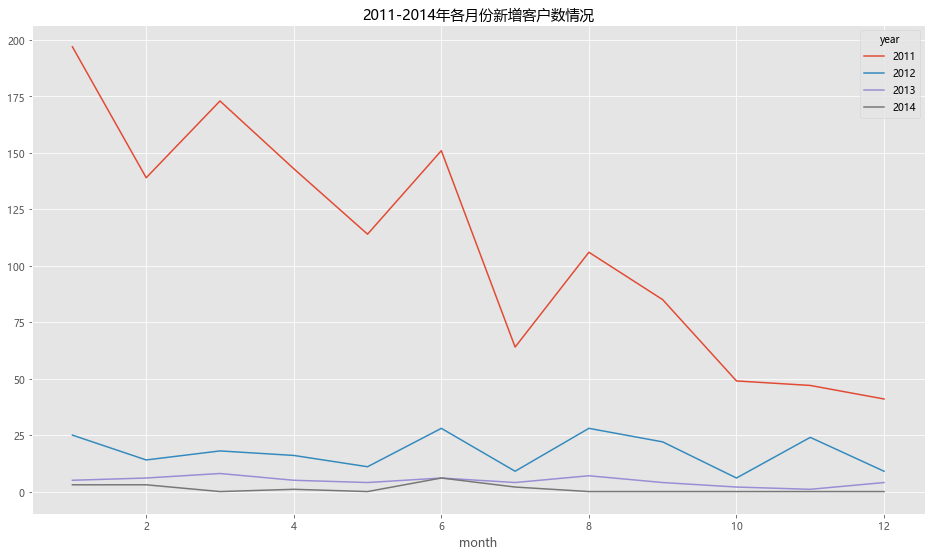

In [31]:
customer = orders.copy().drop_duplicates(subset='CustomerID', keep='first')
customer_year_month = customer.groupby(by=['year', 'month']).size()
customer_year_month = customer_year_month.reset_index(level=[0, 1])
customer_year_month = pd.pivot_table(customer_year_month, index='month', columns='year', values=0, fill_value=0)
customer_year_month.plot(title='2011-2014年各月份新增客户数情况', figsize=(16, 9))

## 3.6 用户RFM模型

> RFM的含义

* R(Recency): 客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则表示客户发生交易的日期越近。
* F(Frequency): 客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
* M(Monetary): 客户在最近一段时间内交易的金额。M值越大，表示客户交易金额越高，价值越大。

| R（用户粘性） | F（用户忠诚度） | M（用户贡献度） | 客户群体类型 |
| ---- | ---- | ---- | ---- |
| 0 | 1 | 1 | 重要价值客户 |
| 1 | 1 | 1 | 重要唤回客户 |
| 0 | 0 | 1 | 重要深耕客户 |
| 1 | 0 | 1 | 重要挽留客户 |
| 0 | 1 | 0 | 潜力客户 |
| 1 | 1 | 0 | 一般维持客户 |
| 0 | 0 | 0 | 新客户 |
| 1 | 0 | 0 | 流失客户 |

In [32]:
# 2014年用户RFM分析
orders_2014 = orders[orders['year'] == 2014]
data_2014 = orders_2014[['CustomerID', 'OrderDate', 'Sales']]
data_2014.shape

(17471, 3)

In [33]:
customer_2014 = data_2014.copy()
customer_2014.set_index('CustomerID', drop=True, inplace=True)
customer_2014['orders'] = 1

In [34]:
rfm_2014 = customer_2014.pivot_table(
    index=['CustomerID'],
    values=['OrderDate', 'orders', 'Sales'],
    aggfunc={
        'OrderDate': 'max',
        'orders': 'sum',
        'Sales': 'sum'
    }
)
rfm_2014['R'] = (rfm_2014.OrderDate.max() - rfm_2014.OrderDate).dt.days
rfm_2014.rename(columns={'Sales': 'M', 'orders': 'F'}, inplace=True)
rfm_2014

,OrderDate,M,F,R
CustomerID,,,,
AA-10315,2014-12-23,3889.2065,17,8
AA-10375,2014-12-25,1904.5380,14,6
AA-10480,2014-08-28,7752.9070,10,125
AA-10645,2014-12-03,3539.8788,19,28
AA-315,2014-12-29,787.3920,3,2
...,...,...,...,...
YS-21880,2014-12-22,7282.4740,19,9
ZC-11910,2014-06-14,7.1730,1,200
ZC-21910,2014-12-28,4922.8390,27,3


In [35]:
def rmf_func(x):
    level = x.apply(lambda x: '1' if x >= 0 else '0')
    lable = level.R + level.F + level.M
    d = {
        '011' : '重要价值客户',
        '111' : '重要唤回客户',
        '001' : '重要深耕客户',
        '101' : '重要挽留客户',
        '010' : '潜力客户',
        '110' : '一般维持客户',
        '000' : '新客户',
        '100' : '流失客户',
    }
    return d[lable]

In [36]:
rfm_2014['label'] = rfm_2014[['R', 'F', 'M']].apply(lambda x: x-x.mean()).apply(rmf_func, axis=1)
rfm_2014.head()

,OrderDate,M,F,R,label
CustomerID,,,,,
AA-10315,2014-12-23,3889.2065,17,8,重要价值客户
AA-10375,2014-12-25,1904.5380,14,6,潜力客户
AA-10480,2014-08-28,7752.9070,10,125,重要挽留客户
AA-10645,2014-12-03,3539.8788,19,28,重要价值客户
AA-315,2014-12-29,787.3920,3,2,新客户


In [37]:
rfm_2014.groupby(by='label').count()

,OrderDate,M,F,R
label,,,,
一般维持客户,14,14,14,14
新客户,407,407,407,407
流失客户,370,370,370,370
潜力客户,113,113,113,113
重要价值客户,487,487,487,487
重要唤回客户,42,42,42,42
重要挽留客户,21,21,21,21
重要深耕客户,56,56,56,56


<AxesSubplot:title={'center':'2011-2014年各市场销售占比情况'}, ylabel='label'>

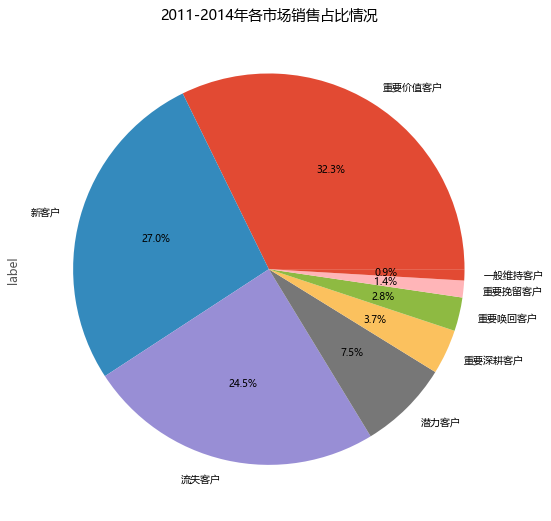

In [38]:
rfm_2014.label.value_counts().plot.pie(autopct='%1.1f%%', title='2011-2014年各市场销售占比情况', figsize=(16, 9))

## 3.7 用户RFM模型评分

根据RFM模型中RIFVM分别评分,评分规则如下：

R： R值越大，评分越小。

F：F值越大，评分越大。

M：M值越大，评分越大。

| R（用户粘性） | F（用户忠诚度） | M（用户贡献度） | 客户群体类型 | 成交客户等级 |
| ---- | ---- | ---- | ---- | :----: |
| 0 | 1 | 1 | 重要价值客户 | A |
| 1 | 1 | 1 | 重要唤回客户 | A |
| 0 | 0 | 1 | 重要深耕客户 | B |
| 1 | 0 | 1 | 重要挽留客户 | B |
| 0 | 1 | 0 | 潜力客户 | B |
| 1 | 1 | 0 | 一般维持客户 | B |
| 0 | 0 | 0 | 新客户 | B |
| 1 | 0 | 0 | 流失客户 | C |

In [39]:
custom_grade_df = orders_2014.copy()
custom_grade_df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,year,month,quarter
33625,33623,CA-2014-100202,2014-01-01,2014-01-06,Standard Class,BD-11620,Brian DeCherney,Consumer,Anaheim,California,...,Adtran 1202752G1,302.376,3,0.2,22.6782,24.99,Medium,2014,1,2014Q1
33626,33624,IN-2014-48758,2014-01-01,2014-01-05,Standard Class,GM-14680,Greg Matthias,Consumer,Hangzhou,Zhejiang,...,"Avery Color Coded Labels, Laser Printer Compat...",39.870,3,0.0,8.7300,5.62,High,2014,1,2014Q1
33627,33625,ES-2014-2774938,2014-01-01,2014-01-03,Second Class,FH-14350,Fred Harton,Consumer,Pantin,Ile-de-France,...,"Boston Markers, Water Color",29.550,1,0.0,0.0000,1.96,High,2014,1,2014Q1
33628,33626,AG-2014-2360,2014-01-01,2014-01-06,Standard Class,JE-5475,Jeremy Ellison,Consumer,Mostaganem,Mostaganem,...,"Cameo Business Envelopes, Recycled",19.350,1,0.0,2.1000,2.75,High,2014,1,2014Q1
33629,33627,PL-2014-150,2014-01-01,2014-01-05,Standard Class,DO-3645,Doug O'Connell,Consumer,Gdynia,Pomerania,...,"Cameo Manila Envelope, Set of 50",54.000,2,0.0,4.8600,9.38,High,2014,1,2014Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.2800,2.97,Medium,2014,12,2014Q4
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,"Tenex Frame, Erganomic",173.760,4,0.6,-117.3600,13.72,Medium,2014,12,2014Q4
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014,12,2014Q4
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.2500,2.21,Medium,2014,12,2014Q4


In [40]:
# 排序函数
def order_sort(group):
    return group.sort_values(by='OrderDate')[-1:]
# 将数据按客户工D分组
data_14_group = orders_2014.groupby(by='CustomerID', as_index=False)
# 将每个分组对象的数据排序，并取出日期最大的数据
data_max_time = data_14_group.apply(order_sort)

In [41]:
# 为数据添加F列
data_max_time['F'] = data_14_group.size()['size'].values
# 为数据添加M列
data_max_time['M'] = data_14_group.sum()['Sales'].values
data_max_time

,,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Quantity,Discount,Profit,ShippingCost,OrderPriority,year,month,quarter,F,M
0,50439,50437,IN-2014-55191,2014-12-23,2014-12-29,Standard Class,AA-10315,Alex Avila,Consumer,Chennai,Tamil Nadu,...,3,0.00,13.3200,2.57,Medium,2014,12,2014Q4,17,3889.2065
1,50605,50603,IN-2014-25644,2014-12-25,2014-12-30,Standard Class,AA-10375,Allen Armold,Consumer,Tamworth,New South Wales,...,4,0.10,153.0600,25.03,Medium,2014,12,2014Q4,14,1904.5380
2,43054,43052,ID-2014-31440,2014-08-28,2014-09-01,Standard Class,AA-10480,Andrew Allen,Consumer,Valenzuela,National Capital,...,2,0.45,-7.1010,2.66,High,2014,8,2014Q3,10,7752.9070
3,49133,49131,ID-2014-67357,2014-12-03,2014-12-08,Second Class,AA-10645,Anna Andreadi,Consumer,Surabaya,Jawa Timur,...,7,0.47,-5.8443,3.69,Medium,2014,12,2014Q4,19,3539.8788
4,50872,50870,TU-2014-1970,2014-12-29,2015-01-04,Standard Class,AA-315,Alex Avila,Consumer,Etimesgut,Ankara,...,1,0.60,-19.5780,0.72,Medium,2014,12,2014Q4,3,787.3920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,50393,50391,CA-2014-138380,2014-12-22,2014-12-26,Standard Class,YS-21880,Yana Sorensen,Corporate,Oakland,California,...,7,0.00,290.0058,172.55,High,2014,12,2014Q4,19,7282.4740
1506,39455,39453,NI-2014-5140,2014-06-14,2014-06-18,Standard Class,ZC-11910,Zuschuss Carroll,Consumer,Maiduguri,Borno,...,1,0.70,-15.5670,0.85,High,2014,6,2014Q2,1,7.1730
1507,50843,50841,ES-2014-5366847,2014-12-28,2014-12-31,First Class,ZC-21910,Zuschuss Carroll,Consumer,Wolverhampton,England,...,9,0.00,47.2500,40.28,Medium,2014,12,2014Q4,27,4922.8390
1508,50838,50836,EG-2014-5780,2014-12-28,2014-12-30,Second Class,ZD-11925,Zuschuss Donatelli,Consumer,Cairo,Al Qahirah,...,1,0.00,1.3800,1.23,High,2014,12,2014Q4,8,856.2600


In [42]:
# 确定统计日期
stat_date = pd.to_datetime('2014-12-31')
# 计算最近一次交易时间的间隔
r_data = stat_date - data_max_time['OrderDate']
# 为数据添加R列
data_max_time['R'] = r_data.values
data_max_time

,,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Discount,Profit,ShippingCost,OrderPriority,year,month,quarter,F,M,R
0,50439,50437,IN-2014-55191,2014-12-23,2014-12-29,Standard Class,AA-10315,Alex Avila,Consumer,Chennai,Tamil Nadu,...,0.00,13.3200,2.57,Medium,2014,12,2014Q4,17,3889.2065,8 days
1,50605,50603,IN-2014-25644,2014-12-25,2014-12-30,Standard Class,AA-10375,Allen Armold,Consumer,Tamworth,New South Wales,...,0.10,153.0600,25.03,Medium,2014,12,2014Q4,14,1904.5380,6 days
2,43054,43052,ID-2014-31440,2014-08-28,2014-09-01,Standard Class,AA-10480,Andrew Allen,Consumer,Valenzuela,National Capital,...,0.45,-7.1010,2.66,High,2014,8,2014Q3,10,7752.9070,125 days
3,49133,49131,ID-2014-67357,2014-12-03,2014-12-08,Second Class,AA-10645,Anna Andreadi,Consumer,Surabaya,Jawa Timur,...,0.47,-5.8443,3.69,Medium,2014,12,2014Q4,19,3539.8788,28 days
4,50872,50870,TU-2014-1970,2014-12-29,2015-01-04,Standard Class,AA-315,Alex Avila,Consumer,Etimesgut,Ankara,...,0.60,-19.5780,0.72,Medium,2014,12,2014Q4,3,787.3920,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,50393,50391,CA-2014-138380,2014-12-22,2014-12-26,Standard Class,YS-21880,Yana Sorensen,Corporate,Oakland,California,...,0.00,290.0058,172.55,High,2014,12,2014Q4,19,7282.4740,9 days
1506,39455,39453,NI-2014-5140,2014-06-14,2014-06-18,Standard Class,ZC-11910,Zuschuss Carroll,Consumer,Maiduguri,Borno,...,0.70,-15.5670,0.85,High,2014,6,2014Q2,1,7.1730,200 days
1507,50843,50841,ES-2014-5366847,2014-12-28,2014-12-31,First Class,ZC-21910,Zuschuss Carroll,Consumer,Wolverhampton,England,...,0.00,47.2500,40.28,Medium,2014,12,2014Q4,27,4922.8390,3 days
1508,50838,50836,EG-2014-5780,2014-12-28,2014-12-30,Second Class,ZD-11925,Zuschuss Donatelli,Consumer,Cairo,Al Qahirah,...,0.00,1.3800,1.23,High,2014,12,2014Q4,8,856.2600,3 days


In [43]:
# 设置F维度的评分
section_list_F = [0, 5, 10, 15, 20, 50]
# 根据区间设置评分
grade_F = pd.cut(data_max_time['F'], bins=section_list_F, labels=[1, 2, 3, 4, 5])
# 添加FS评分列
data_max_time['FS'] = grade_F.values

# 设置M维度的评分
section_list_M = [0, 500, 1000, 5000, 10000, 30000]
# 根据区间设置评分
grade_M = pd.cut(data_max_time['M'], bins=section_list_M, labels=[1, 2, 3, 4, 5])
# 添加MS评分列
data_max_time['MS'] = grade_M.values

# 设置R维度的评分
import datetime
section_list_R = [datetime.timedelta(days=i) for i in [-1, 32, 93, 186, 277, 365]]
# 根据区间设置评分
grade_R = pd.cut(data_max_time['R'], bins=section_list_R, labels=[5, 4, 3, 2, 1])
# 添加RS评分列
data_max_time['RS'] = grade_R.values

In [44]:
# 设置F维度高低值
data_max_time['FS'] = data_max_time['FS'].values.astype(int)
# 根据评分平均分设置FS维度的高低值
grade_avg = data_max_time['FS'].values.sum() / data_max_time['FS'].count()
# 将高对应为1，低设置为0
data_F_S = data_max_time['FS'].where(data_max_time['FS'] > grade_avg, 0)
data_max_time['F_high_low'] = data_F_S.where(data_max_time['FS'] < grade_avg, 1).values

# 设置M维度高低值
data_max_time['MS'] = data_max_time['MS'].values.astype(int)
# 根据评分平均分设置MS维度的高低值
grade_avg = data_max_time['MS'].values.sum() / data_max_time['MS'].count()
# 将高对应为1，低设置为0
data_M_S = data_max_time['MS'].where(data_max_time['MS'] > grade_avg, 0)
data_max_time['M_high_low'] = data_M_S.where(data_max_time['MS'] < grade_avg, 1).values

# 设置R维度高低值
data_max_time['RS'] = data_max_time['RS'].values.astype(int)
# 根据评分平均分设置RS维度的高低值
grade_avg = data_max_time['RS'].values.sum() / data_max_time['RS'].count()
# 将高对应为1，低设置为0
data_R_S = data_max_time['RS'].where(data_max_time['RS'] > grade_avg, 0)
data_max_time['R_high_low'] = data_R_S.where(data_max_time['RS'] < grade_avg, 1).values

In [45]:
# 截取部分列数据
data_rfm = data_max_time[['CustomerID', 'F_high_low', 'M_high_low', 'R_high_low']]

def get_sum_values(series):
    return ''.join(list(map(str, series.values.tolist()[1:])))

# 添加RFM字符串列
data_rfm['RFM'] = data_rfm.apply(get_sum_values, axis=1)
d = {
    '011' : '重要价值客户',
    '111' : '重要唤回客户',
    '001' : '重要深耕客户',
    '101' : '重要挽留客户',
    '010' : '潜力客户',
    '110' : '一般维持客户',
    '000' : '新客户',
    '100' : '流失客户',
}
# RFM字符串数据映射成对应类型文字
data_rfm['RFM_type'] = data_rfm['RFM'].map(d)
data_rfm

C:\Users\39217\AppData\Local\Temp/ipykernel_4196/142428972.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['RFM'] = data_rfm.apply(get_sum_values, axis=1)
C:\Users\39217\AppData\Local\Temp/ipykernel_4196/142428972.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm['RFM_type'] = data_rfm['RFM'].map(d)


,,CustomerID,F_high_low,M_high_low,R_high_low,RFM,RFM_type
0,50439,AA-10315,1,1,1,111,重要唤回客户
1,50605,AA-10375,1,1,1,111,重要唤回客户
2,43054,AA-10480,0,1,0,010,潜力客户
3,49133,AA-10645,1,1,1,111,重要唤回客户
4,50872,AA-315,0,0,1,001,重要深耕客户
...,...,...,...,...,...,...,...
1505,50393,YS-21880,1,1,1,111,重要唤回客户
1506,39455,ZC-11910,0,0,0,000,新客户
1507,50843,ZC-21910,1,1,1,111,重要唤回客户
1508,50838,ZD-11925,0,0,1,001,重要深耕客户


In [46]:
rfm_size = data_rfm.groupby('RFM_type').size().to_frame()
rfm_size['rfm_pct'] = [(i/sum(rfm_size.values) * 100)[0] for i in rfm_size.values]
rfm_size

,0,rfm_pct
RFM_type,,
一般维持客户,228,15.099338
新客户,403,26.688742
流失客户,5,0.331126
潜力客户,139,9.205298
重要价值客户,111,7.350993
重要唤回客户,471,31.192053
重要挽留客户,8,0.529801
重要深耕客户,145,9.602649


<AxesSubplot:title={'center':'RFM类型占比'}, ylabel='rfm_pct'>

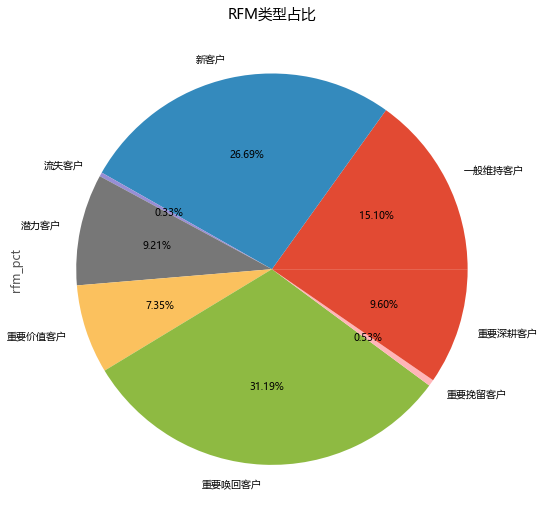

In [47]:
rfm_size.rfm_pct.plot.pie(figsize=(16, 9), autopct='%.2f%%', fontsize=10, title='RFM类型占比')